In [1]:
from google.colab import drive

# Mount Google Drive to /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!du -hs /content/hidden

du: cannot access '/content/hidden': No such file or directory


In [2]:
!unzip /content/drive/MyDrive/hidden.zip

Streaming output truncated to the last 5000 lines.
 extracting: hidden/video_16591/image_2.png  
 extracting: hidden/video_16591/image_3.png  
 extracting: hidden/video_16591/image_1.png  
 extracting: hidden/video_16591/image_0.png  
 extracting: hidden/video_16591/image_4.png  
 extracting: hidden/video_16591/image_5.png  
 extracting: hidden/video_16591/image_7.png  
 extracting: hidden/video_16591/image_6.png  
   creating: hidden/video_15126/
 extracting: hidden/video_15126/image_10.png  
 extracting: hidden/video_15126/image_8.png  
 extracting: hidden/video_15126/image_9.png  
 extracting: hidden/video_15126/image_2.png  
 extracting: hidden/video_15126/image_3.png  
 extracting: hidden/video_15126/image_1.png  
 extracting: hidden/video_15126/image_0.png  
 extracting: hidden/video_15126/image_4.png  
 extracting: hidden/video_15126/image_5.png  
 extracting: hidden/video_15126/image_7.png  
 extracting: hidden/video_15126/image_6.png  
   creating: hidden/video_15748/
 extract

In [ ]:
!rm -rf /content/drive/MyDrive/Dataset_original/hidden

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader# Replace with your actual dataset module
from torchvision.models.segmentation import deeplabv3_resnet101
from tqdm import tqdm
import csv
from PIL import Image
import numpy as np
def load_deeplabv3_resnet101_from_checkpoint(checkpoint_path):
    # Load the model from a checkpoint
    model = deeplabv3_resnet101(pretrained=False,num_classes=49)
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint)
    model.cuda()
    model.eval()
    return model

def preprocess_image(image_path):
    # Preprocess the input image
    transform = transforms.Compose([
        transforms.ToTensor()

    ])

    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return input_tensor

def perform_inference(model, input_tensor):
    # Perform inference
    with torch.no_grad():
        output = model(input_tensor)['out'][0]
    return output

def main():
    # Replace with the path to your checkpoint file
    checkpoint_path = '/content/drive/MyDrive/deeplabv3_model_14.pth'

    # Load the model from the checkpoint
    model = load_deeplabv3_resnet101_from_checkpoint(checkpoint_path)

    # Replace with the path to your input image
    op_list=[]
    for i in range(15000,17000):
        image_path = './hidden/video_'+str(i)+'/image_10.png'
        print(i)

        # Preprocess the input image
        input_tensor = preprocess_image(image_path)

        # Perform inference
        output = perform_inference(model, input_tensor.cuda())
        print(output.shape)
        predicted_class = torch.argmax(output, dim=0)
        op_list.append(predicted_class)

        # Post-process the output (e.g., visualize or save the result)
        # ...`

    op_list=torch.stack(op_list)
    torch.save(op_list.cpu(),'final_result.pth')

    print("Inference completed.")

if __name__ == "__main__":
    main()


15000
torch.Size([49, 160, 240])
15001
torch.Size([49, 160, 240])
15002
torch.Size([49, 160, 240])
15003
torch.Size([49, 160, 240])
15004
torch.Size([49, 160, 240])
15005
torch.Size([49, 160, 240])
15006
torch.Size([49, 160, 240])
15007
torch.Size([49, 160, 240])
15008
torch.Size([49, 160, 240])
15009
torch.Size([49, 160, 240])
15010
torch.Size([49, 160, 240])
15011
torch.Size([49, 160, 240])
15012
torch.Size([49, 160, 240])
15013
torch.Size([49, 160, 240])
15014
torch.Size([49, 160, 240])
15015
torch.Size([49, 160, 240])
15016
torch.Size([49, 160, 240])
15017
torch.Size([49, 160, 240])
15018
torch.Size([49, 160, 240])
15019
torch.Size([49, 160, 240])
15020
torch.Size([49, 160, 240])
15021
torch.Size([49, 160, 240])
15022
torch.Size([49, 160, 240])
15023
torch.Size([49, 160, 240])
15024
torch.Size([49, 160, 240])
15025
torch.Size([49, 160, 240])
15026
torch.Size([49, 160, 240])
15027
torch.Size([49, 160, 240])
15028
torch.Size([49, 160, 240])
15029
torch.Size([49, 160, 240])
15030
torc

In [5]:
res=torch.load('final_result.pth')

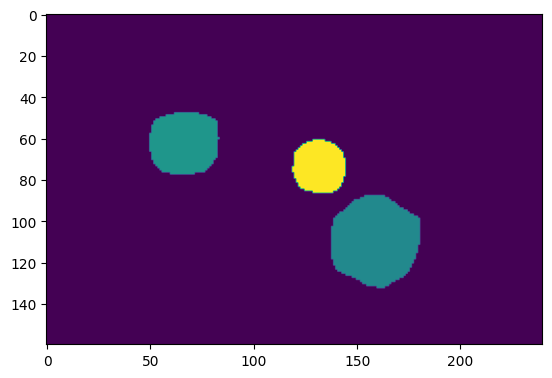

In [6]:
import matplotlib.pyplot as plt
plt.imshow(res[0].numpy())

In [7]:
print(res.shape)

torch.Size([2000, 160, 240])


In [10]:
import torch
from torchmetrics import JaccardIndex

# Example usage:
# Assuming submitted_tensor and ground_truth are tensors with class indices
# Adjust num_classes based on the number of classes in your segmentation task
num_classes = 49
submitted_tensor = res
ground_truth = res

# Calculate Jaccard Similarity using JaccardIndex metric
jaccard = JaccardIndex(num_classes=num_classes,task='multiclass')
jaccard_similarity = jaccard(submitted_tensor, ground_truth)

print(f"Jaccard Similarity: {jaccard_similarity.item()}")


Jaccard Similarity: 1.0


In [9]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 11.1 MB/s eta 0:00:00


In [11]:
!cp final_result.pth /content/drive/MyDrive/

In [ ]:
!nvidia-smi

Wed Dec  6 18:26:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    29W /  70W |  15091MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------